In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import ticker
from scipy.stats import sem
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
from scipy.stats import ttest_rel
default_img_set()


In [2]:
with open('../Results/Metrics_All_Pre_Post.pkl', 'rb') as f:
    Metrics = pickle.load(f)

In [3]:
df_abs_pre = Metrics["df_abs_tp1"].mean(axis=(0,4))
df_abs_post = Metrics["df_abs_tp2"].mean(axis=(0,4))
variance_pre = Metrics["variance_median_tp1"].mean(axis=(0,4))
variance_post = Metrics["variance_median_tp2"].mean(axis=(0,4))
FanoFactor_pre = Metrics["FanoFactor_median_tp1"].mean(axis=(0,4))
FanoFactor_post = Metrics["FanoFactor_median_tp2"].mean(axis=(0,4))
NoiseCorrelation_pre = Metrics["NoiseCorrelation_median_tp1"].mean(axis=(0,4))
NoiseCorrelation_post = Metrics["NoiseCorrelation_median_tp2"].mean(axis=(0,4))
LFI_pre = Metrics["LFI_tp1"].mean(axis=(0,4))
LFI_post = Metrics["LFI_tp2"].mean(axis=(0,4))
rotation  = Metrics["rotation_tp1_tp2"].mean(axis=(0,4))
PCA_LFI = Metrics["PCA_LFI"].mean(axis=(0,4))
N_Neuron = Metrics['N_Neuron'].mean(axis=(0,4))
Decoding_pre = Metrics["Decoding_tp1"].mean(axis=(0,4))
Decoding_post = Metrics["Decoding_tp2"].mean(axis=(0,4))

In [4]:
sigstrength_mean = np.vstack((df_abs_pre.mean(axis=1).mean(axis=(0)),df_abs_post.mean(axis=1).mean(axis=(0)))).T
sigstrength_se = np.vstack((sem(df_abs_pre.mean(axis=1), axis=0),sem(df_abs_post.mean(axis=1), axis=0))).T
variance_mean = np.vstack((variance_pre.mean(axis=1).mean(axis=(0)),variance_post.mean(axis=1).mean(axis=(0)))).T
variance_se = np.vstack((sem(variance_pre.mean(axis=1), axis=0),sem(variance_post.mean(axis=1), axis=0))).T
rotation_mean = rotation.mean(axis=1).mean(axis=(0))
rotation_se = sem(rotation.mean(axis=1), axis=0)
FF_mean = np.vstack((FanoFactor_pre.mean(axis=1).mean(axis=(0)),FanoFactor_post.mean(axis=1).mean(axis=(0)))).T
FF_se = np.vstack((sem(FanoFactor_pre.mean(axis=1), axis=0),sem(FanoFactor_post.mean(axis=1), axis=0))).T
NC_mean = np.vstack((NoiseCorrelation_pre.mean(axis=1).mean(axis=(0)),NoiseCorrelation_post.mean(axis=1).mean(axis=(0)))).T
NC_se = np.vstack((sem(NoiseCorrelation_pre.mean(axis=1), axis=0),sem(NoiseCorrelation_post.mean(axis=1), axis=0))).T
LFI_mean = np.vstack((LFI_pre.mean(axis=1).mean(axis=(0)),LFI_post.mean(axis=1).mean(axis=(0)))).T
LFI_se = np.vstack((sem(LFI_pre.mean(axis=1), axis=0),sem(LFI_post.mean(axis=1), axis=0))).T
Decoding_mean = np.vstack((Decoding_pre.mean(axis=1).mean(axis=(0)),Decoding_post.mean(axis=1).mean(axis=(0)))).T
Decoding_se = np.vstack((sem(Decoding_pre.mean(axis=1), axis=0),sem(Decoding_post.mean(axis=1), axis=0))).T
PCA_LFI_mean = PCA_LFI.mean(axis=1).mean(axis=(0))
PCA_LFI_se = sem(PCA_LFI.mean(axis=1),axis=0)

2
2
2
2
1


Text(0.5, 0, 'Layer')

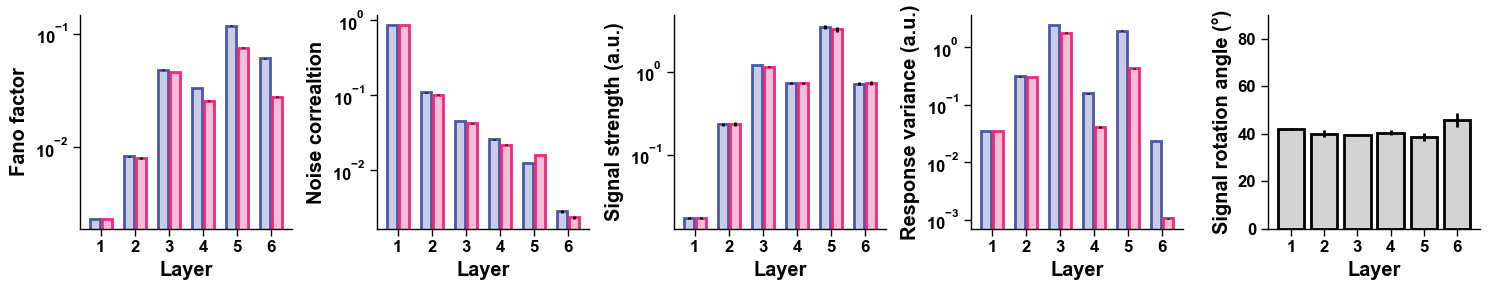

In [5]:
ryzcolor=colorpalettable('ryz1')
C0, C1=np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha, C1_alpha=np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1]=0.3
C1_alpha[-1]=0.3


fig, ax = plt.subplots(1, 5, figsize=(15, 3))

# Fano Factor
plt.sca(ax[0])
bar(np.arange(1, 7, 1), FF_mean, yerr=FF_se, ecolor='k', width=0.3, bargap=0.06, color=[C0_alpha, C1_alpha],edgecolor=[C0, C1], linewidth=2)
ax[0].set_yscale("log")
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].set_xlabel("Layer")
ax[0].set_ylabel('Fano factor')
ax[0].minorticks_off()

# Noise Correlation
plt.sca(ax[1])
bar(np.arange(1, 7, 1), NC_mean, yerr=NC_se, ecolor='k', width=0.3, bargap=0.06, color=[C0_alpha, C1_alpha],edgecolor=[C0, C1], linewidth=2)
ax[1].set_yscale("log")
ax[1].set_xticks([1, 2, 3, 4, 5, 6])
ax[1].set_xlabel("Layer")
ax[1].set_ylabel('Noise correaltion')
ax[1].minorticks_off()

# Signal strength
plt.sca(ax[2])
bar(np.arange(1, 7, 1), sigstrength_mean,
    yerr=sigstrength_se, ecolor='k', width=0.3, bargap=0.06, color=[C0_alpha, C1_alpha],edgecolor=[C0, C1], linewidth=2)
# ax[0].set_ylim([0, 8])
ax[2].set_yscale("log")
ax[2].set_xticks([1, 2, 3, 4, 5, 6])
ax[2].set_xlabel("Layer")
ax[2].set_ylabel('Signal strength (a.u.)')
ax[2].minorticks_off()

# Variance
plt.sca(ax[3])
bar(np.arange(1, 7, 1), variance_mean, yerr=variance_se, ecolor='k', width=0.3, bargap=0.06, color=[C0_alpha, C1_alpha],edgecolor=[C0, C1], linewidth=2)
ax[3].set_yscale("log")
ax[3].set_xticks([1, 2, 3, 4, 5, 6])
ax[3].set_xlabel("Layer")
ax[3].set_ylabel('Response variance (a.u.)')
ax[3].minorticks_off()

# Signal rotation angle
plt.sca(ax[4])
bar(np.arange(1, 7, 1), rotation_mean, yerr=rotation_se,
    width=0.8, edgecolor='k', facecolor='lightgray', linewidth=2)
ax[4].set_xticks([1, 2, 3, 4, 5, 6])
ax[4].set_ylim([0, 90])
ax[4].set_ylabel('Signal rotation angle (°)')
ax[4].set_xlabel('Layer')
# plt.savefig('FigS3_1.pdf')

4
4
4
4
4
4


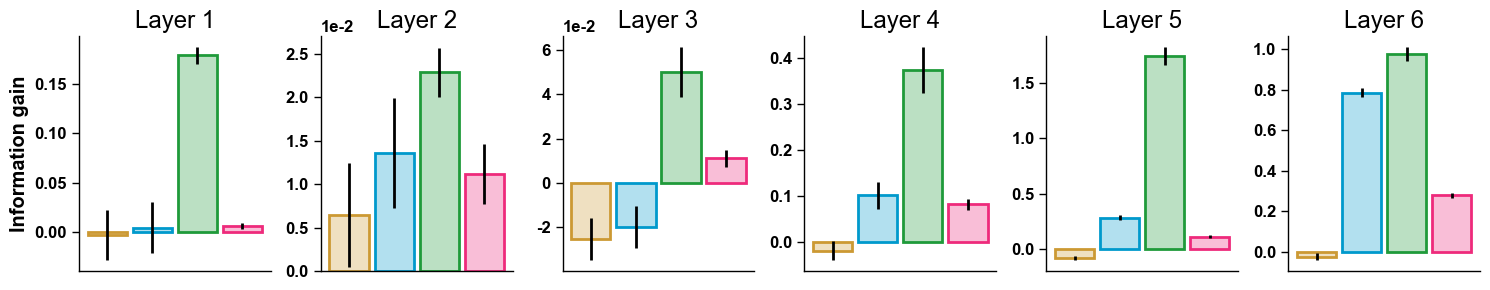

In [6]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3
Clist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227]), np.array(ryzcolor(1))]
Calphalist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227, 1.0]), np.array(ryzcolor(1))]
Calphalist[0][-1]=0.3
Calphalist[1][-1]=0.3
Calphalist[2][-1]=0.3
Calphalist[3][-1]=0.3

fig, ax = plt.subplots(1,6,figsize=(15, 3))
for i in range(6):
    plt.sca(ax[i])
    patch,_= bar(np.array(1),PCA_LFI_mean[i:i+1,:], yerr=PCA_LFI_se[i:i+1,:], width=0.2, bargap=0.03, ecolor='k', color=Calphalist, edgecolor=Clist, linewidth=2)
    if i ==0:
        ax[i].set_ylabel('Information gain')
    ax[i].set_title('Layer ' + str(i+1))
    ax[i].set_xticks([])
    ax[i].ticklabel_format(style="sci", scilimits=(-1.5,1), axis='y')

# plt.savefig('FigS3_2.pdf')

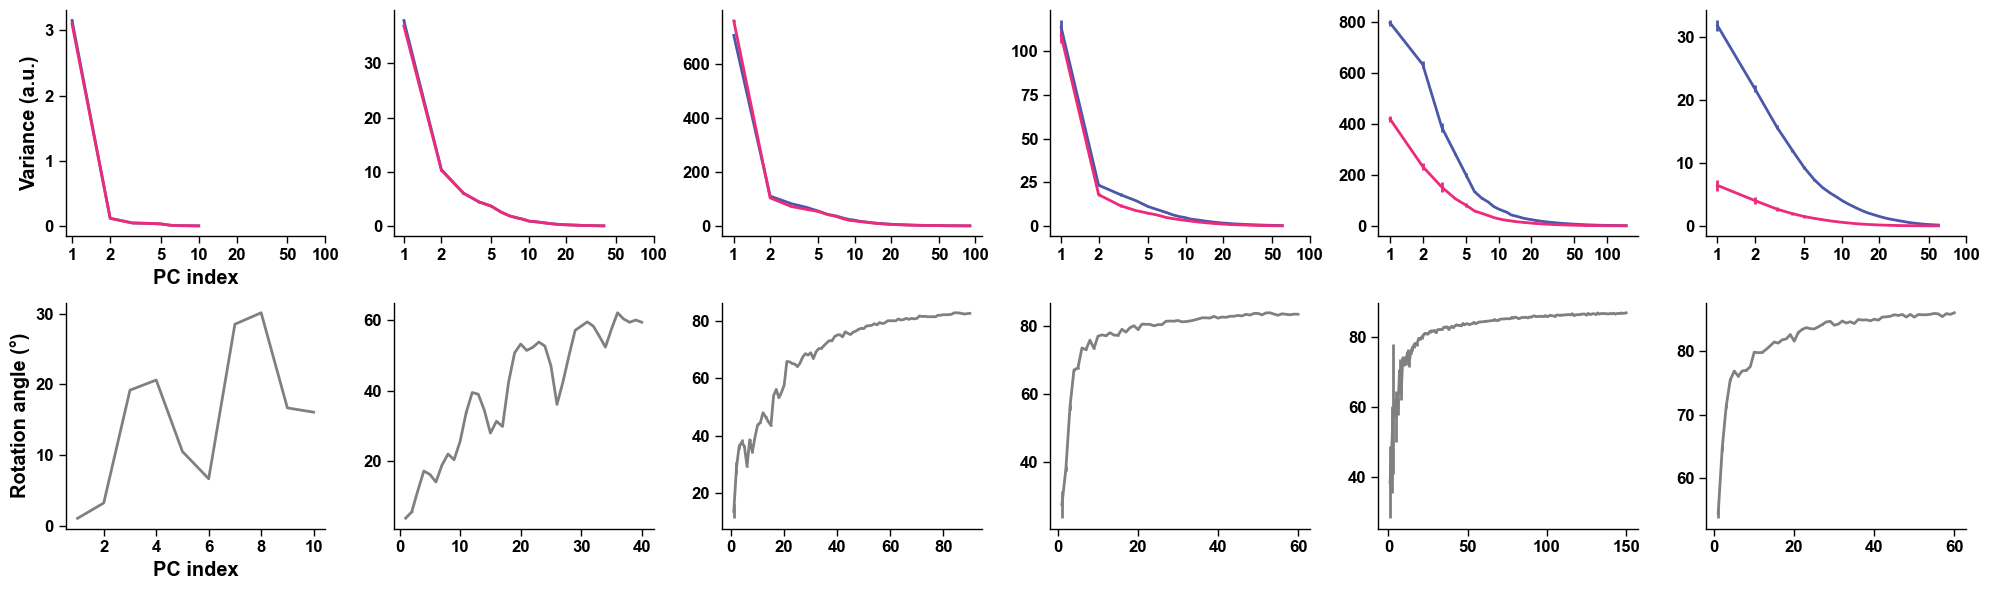

In [7]:
fig, ax = plt.subplots(2, 6, figsize=(20, 6))
n_eigen = [10, 40, 90, 60, 150, 60]

for i_layer in range(6):
    PC_abs_pre_mean = np.mean(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
    PC_abs_post_mean = np.mean(np.mean(np.array(Metrics['PC_abs_post'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
    PCA_rotation_mean = np.mean(np.mean(np.array(Metrics['PCA_rotation'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
    PC_abs_pre_se = sem(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
    PC_abs_post_se = sem(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)
    PCA_rotation_se = sem(np.mean(np.array(Metrics['PC_abs_pre'][:,:,:, i_layer,:].tolist()),axis=(0,2,3)), axis=0)

    plt.sca(ax[0, i_layer])
    plot(np.arange(1,n_eigen[i_layer]+1), PC_abs_pre_mean[:n_eigen[i_layer]].T, PC_abs_pre_se[:n_eigen[i_layer]].T, color=ryzcolor(0), label="Pre")
    plot(np.arange(1,n_eigen[i_layer]+1), PC_abs_post_mean[:n_eigen[i_layer]].T, PC_abs_post_se[:n_eigen[i_layer]].T, color=ryzcolor(1), label="Post")
    if i_layer == 0:
        ax[0, i_layer].set_ylabel('Variance (a.u.)')
        ax[0, i_layer].set_xlabel('PC index')
    ax[0, i_layer].set_xscale("log")
    xticks=[1, 2, 5, 10, 20, 50, 100]
    ax[0, i_layer].set_xticks(xticks)
    ax[0, i_layer].set_xticklabels([str(i) for i in xticks])
    # ax[0].legend(loc = "upper right")
    ax[0, i_layer].minorticks_off()


    plt.sca(ax[1, i_layer])
    plot(np.arange(1,n_eigen[i_layer]+1), PCA_rotation_mean[:n_eigen[i_layer]].T, PCA_rotation_se[:n_eigen[i_layer]].T, color='gray')
    if i_layer == 0:
        ax[1, i_layer].set_ylabel('Rotation angle (°)')
        ax[1, i_layer].set_xlabel('PC index')

